In [21]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as regex
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [2]:
bbchealth = 'bbchealth.txt'
cbchealth = 'cbchealth.txt'
cnnhealth = 'cnnhealth.txt'
everydayhealth = 'everydayhealth.txt'
foxnewshealth = 'foxnewshealth.txt'
gdnhealthcare = 'gdnhealthcare.txt'
goodhealth = 'goodhealth.txt'
KaiserHealthNews = 'KaiserHealthNews.txt'
latimeshealth = 'latimeshealth.txt'
msnhealthnews = 'msnhealthnews.txt'
NBChealth = 'NBChealth.txt'
nprhealth = 'nprhealth.txt'
nytimeshealth = 'nytimeshealth.txt'
reuters_health = 'reuters_health.txt'
usnewshealth = 'usnewshealth.txt'
wsjhealth = 'wsjhealth.txt'

In [3]:
filenames = [bbchealth, cbchealth, cnnhealth, everydayhealth, foxnewshealth, gdnhealthcare, goodhealth, KaiserHealthNews,
            latimeshealth, msnhealthnews, NBChealth, nprhealth, nytimeshealth, reuters_health, usnewshealth, wsjhealth]
with open('allaccounts.txt', 'w', encoding = 'Latin-1') as outfile:
    for fname in filenames:
        with open(fname, encoding = 'Latin-1') as infile:
            for line in infile:
                outfile.write(line)

In [4]:
allaccounts = pd.read_csv("allaccounts.txt", sep="|", header=None, error_bad_lines=False, encoding = 'Latin-1')

b'Skipping line 3929: expected 3 fields, saw 5\nSkipping line 4774: expected 3 fields, saw 4\nSkipping line 4832: expected 3 fields, saw 4\nSkipping line 4842: expected 3 fields, saw 4\nSkipping line 5192: expected 3 fields, saw 4\nSkipping line 5197: expected 3 fields, saw 4\nSkipping line 5221: expected 3 fields, saw 4\nSkipping line 5276: expected 3 fields, saw 4\nSkipping line 5358: expected 3 fields, saw 4\nSkipping line 5414: expected 3 fields, saw 4\nSkipping line 5638: expected 3 fields, saw 4\nSkipping line 6627: expected 3 fields, saw 4\nSkipping line 6656: expected 3 fields, saw 4\nSkipping line 6928: expected 3 fields, saw 4\nSkipping line 9091: expected 3 fields, saw 4\nSkipping line 9130: expected 3 fields, saw 4\nSkipping line 9137: expected 3 fields, saw 4\nSkipping line 9176: expected 3 fields, saw 4\nSkipping line 9216: expected 3 fields, saw 4\nSkipping line 9397: expected 3 fields, saw 4\nSkipping line 9407: expected 3 fields, saw 4\nSkipping line 9411: expected 3 f

In [5]:
list1 = allaccounts[2].values.tolist()

In [6]:
# Removing Mentions
import re
list2=[]
for i in list1:
    list2.append(re.sub(r'@[A-Za-z0-9]+','', i))
    
# Removing Hashtags
list3=[]
for i in list2:
    list3.append(re.sub(r'#([^\s]+)', r'\1', i))
    
# Removing Hyperlinks
list4 = []
for i in list3:
    list4.append(re.sub(r'http\S+', '', i))
    
# Expanding contractions
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
v = ' \n '.join(list4)
list5 = decontracted(v)
list6 = list5.split(" \n ")

# Removing punctuations and numbers
list7 = []
for i in list6:
    list7.append(re.sub(r"[^a-zA-Z]", ' ', i))
    
# Upper Case to Lower Case
list8 =[x.lower() for x in list7]
list8

['breast cancer risk test devised ',
 'gp workload harming care   bma poll ',
 'short people is  heart risk greater  ',
 'new approach against hiv  promising  ',
 'coalition  undermined nhs    doctors ',
 'review of case against nhs manager ',
 'video   all day is empty  what am i going to do   ',
 'video   overhaul needed  for end of life care ',
 'care for dying  needs overhaul  ',
 'video  nhs  labour and tory key policies ',
 'have gp services got worse  ',
 'a amp e waiting hits new worst level ',
 'parties row over gp opening hours ',
 'why strenuous runs may not be so bad after all ',
 'video  health surcharge for non eu patients ',
 'video  skin cancer spike  from   s holidays  ',
 '        amight die  in future outbreak ',
 'skin cancer  linked to holiday boom  ',
 'public  back tax rises to fund nhs  ',
 'video  welcome to the designer asylum ',
 'video  why are we having less sex  ',
 'five ideas to transform the nhs ',
 'personal cancer vaccines  exciting  ',
 'child heart 

In [7]:
foovec = TfidfVectorizer(min_df = 5, max_df = 0.99, tokenizer=nltk.word_tokenize, ngram_range = (1,1), stop_words = 'english')

In [10]:
import nltk
#nltk.download('punkt')
processed_tweets_tfidf = foovec.fit_transform(list8)
processed_tweets_tfidf.shape

(62813, 8915)

In [11]:
x = foovec.vocabulary_
x

{'breast': 961,
 'cancer': 1146,
 'risk': 6700,
 'test': 7946,
 'gp': 3369,
 'workload': 8800,
 'harming': 3538,
 'care': 1179,
 'poll': 5902,
 'short': 7097,
 'people': 5690,
 'heart': 3589,
 'greater': 3404,
 'new': 5204,
 'approach': 406,
 'hiv': 3684,
 'promising': 6138,
 'coalition': 1509,
 'nhs': 5225,
 'doctors': 2312,
 'review': 6661,
 'case': 1208,
 'manager': 4684,
 'video': 8536,
 'day': 1982,
 'going': 3344,
 'overhaul': 5488,
 'needed': 5172,
 'end': 2568,
 'life': 4472,
 'dying': 2433,
 'needs': 5178,
 'labour': 4322,
 'tory': 8095,
 'key': 4264,
 'policies': 5895,
 'services': 7014,
 'got': 3360,
 'worse': 8818,
 'amp': 299,
 'e': 2438,
 'waiting': 8601,
 'hits': 3682,
 'worst': 8822,
 'level': 4453,
 'parties': 5603,
 'row': 6763,
 'opening': 5395,
 'hours': 3756,
 'runs': 6785,
 'bad': 589,
 'health': 3569,
 'non': 5254,
 'eu': 2671,
 'patients': 5633,
 'skin': 7200,
 'spike': 7394,
 's': 6796,
 'holidays': 3697,
 'die': 2191,
 'future': 3212,
 'outbreak': 5455,
 'link

In [12]:
import operator
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
sorted_x

[('aa', 0),
 ('aah', 1),
 ('aande', 2),
 ('aandecrisis', 3),
 ('ab', 4),
 ('abandon', 5),
 ('abandoned', 6),
 ('abbott', 7),
 ('abbv', 8),
 ('abbvie', 9),
 ('abdomen', 10),
 ('abdominal', 11),
 ('abilities', 12),
 ('ability', 13),
 ('able', 14),
 ('abnormal', 15),
 ('aboriginal', 16),
 ('abortion', 17),
 ('abortions', 18),
 ('abound', 19),
 ('abrar', 20),
 ('abroad', 21),
 ('abs', 22),
 ('absolute', 23),
 ('absolutely', 24),
 ('absorbed', 25),
 ('abstain', 26),
 ('abstinence', 27),
 ('abt', 28),
 ('abundance', 29),
 ('abuse', 30),
 ('abused', 31),
 ('abusing', 32),
 ('abusive', 33),
 ('ac', 34),
 ('aca', 35),
 ('academic', 36),
 ('academics', 37),
 ('acadia', 38),
 ('accelerate', 39),
 ('accelerated', 40),
 ('accept', 41),
 ('acceptable', 42),
 ('acceptance', 43),
 ('accepted', 44),
 ('accepting', 45),
 ('access', 46),
 ('accessible', 47),
 ('accident', 48),
 ('accidental', 49),
 ('accidents', 50),
 ('according', 51),
 ('account', 52),
 ('accountable', 53),
 ('accounts', 54),
 ('accura

In [13]:
new_list=[]
for i in range(len(sorted_x)):
    new_list.append(sorted_x[i][0])
new_list

['aa',
 'aah',
 'aande',
 'aandecrisis',
 'ab',
 'abandon',
 'abandoned',
 'abbott',
 'abbv',
 'abbvie',
 'abdomen',
 'abdominal',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'aboriginal',
 'abortion',
 'abortions',
 'abound',
 'abrar',
 'abroad',
 'abs',
 'absolute',
 'absolutely',
 'absorbed',
 'abstain',
 'abstinence',
 'abt',
 'abundance',
 'abuse',
 'abused',
 'abusing',
 'abusive',
 'ac',
 'aca',
 'academic',
 'academics',
 'acadia',
 'accelerate',
 'accelerated',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accident',
 'accidental',
 'accidents',
 'according',
 'account',
 'accountable',
 'accounts',
 'accuracy',
 'accurate',
 'accuse',
 'accused',
 'accuses',
 'acetaminophen',
 'ache',
 'aches',
 'achieve',
 'achieving',
 'achy',
 'acid',
 'acids',
 'ackman',
 'acl',
 'aclu',
 'acne',
 'aco',
 'acos',
 'acquire',
 'acquired',
 'acquisitions',
 'acronyms',
 'act',
 'actavis',
 'acting',
 'action',
 'actions',
 'active',
 'a

In [14]:
f2=(open(r'tfidfvectors.csv', 'w', newline=''))
writer = csv.writer(f2)
header_row = new_list
writer.writerow(header_row)
p = processed_tweets_tfidf.toarray()
for i in range(len(p)):
    writer.writerow(p[i])

In [15]:
# Machine Learning
df = pd.read_csv('tfidfvectors.csv', encoding = "ISO-8859-1")

In [17]:
X = df.iloc[:,0:8914]
X = StandardScaler().fit_transform(X)

In [27]:
pca = PCA(0.80)
pca.fit(X)
pca.n_components_

5731

In [32]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.00069467, 0.00060509, 0.00054819, 0.00051125])

In [33]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2,3
0,-0.212801,-0.058280,-0.496659,-0.052525
1,-0.053611,-0.108852,0.108567,-0.188257
2,-0.093049,-0.081983,-0.399586,-0.156694
3,-0.212093,-0.050486,-0.197144,-0.063968
4,-0.043119,-0.079109,0.065927,-0.076213


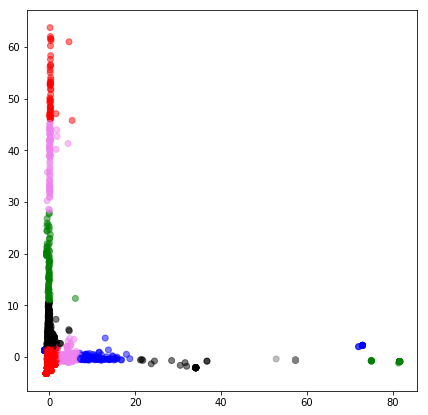

In [37]:
kmeans = KMeans(n_clusters = 16)
#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(principalComponents)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'blue' , 3:'yellow', 4: 'violet' 
                   ,5: 'black',6:'red', 7: 'green', 
                  8: 'black', 9:'blue', 10: 'green', 11: 'yellow', 12:'violet', 13: 'grey', 14: 'blue', 15: 'red'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(principalComponents[:,0],principalComponents[:,2], c= label_color, alpha=0.5) 
plt.show()
